## Introduction


This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. We choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, we will prepare the data (handwritten digits images) then we will focus on the CNN modeling and evaluation.

We can divide our project into 4 parts <br>
Part 1 :- preparing data <br>
Part 2 :- Visualisation <br>
Part 3 :- Creating Model <br> 
Part 4 :- Evaluation of Model <br> 

# Part 1 :- Importing neccessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from keras.models import Sequential as sq
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

Using TensorFlow backend.


In [5]:
import itertools # used when plotting confusion matrix

## Importing Data

Data is in form of pixel values (as computer reads image as anarray of pixel values), so we need to convert pixel values into pictures first for our visual representation .

In [6]:
# importing data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# X_train will contain the training data so that
# if we manipulated X_train we will have original data every time.

X_train = train_data.copy()
del X_train['label']
Y_train = train_data['label']

X_train.describe() # describe data will describe the data in short term 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Image Normalising 

Normalising image so that the effect of light and other noise gets minimise and the model can work upon just black color shades.

In [71]:
X_train = X_train / 255.0
test_data = test_data / 255.0

Reshaping the linear pixel values into 2D image of 28 * 28 and the last 1 value is 3D

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

# Label Encoding 

Defining classes for data. <br> 
Like if we are classifying mangos and oranges then the two labels will be mango and orange <br>
I our case labels are 0 1 2 3 4 5 6 7 8 9 <br>

for easy labelling we will be using keras library 

In [9]:
#library used from keras
from keras.utils.np_utils import to_categorical

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)


# Split training and valdiation set


Training and validation are used for calculating score over sample data so that we can how good or bad our model is working. This feature is widely used when we need to deploy our model and classify text in on going process.

In [10]:
from sklearn.model_selection import train_test_split

x_train1,x_test,y_train1,y_test = train_test_split(X_train,Y_train,test_size = 0.1)

We choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

## Visualising Images 

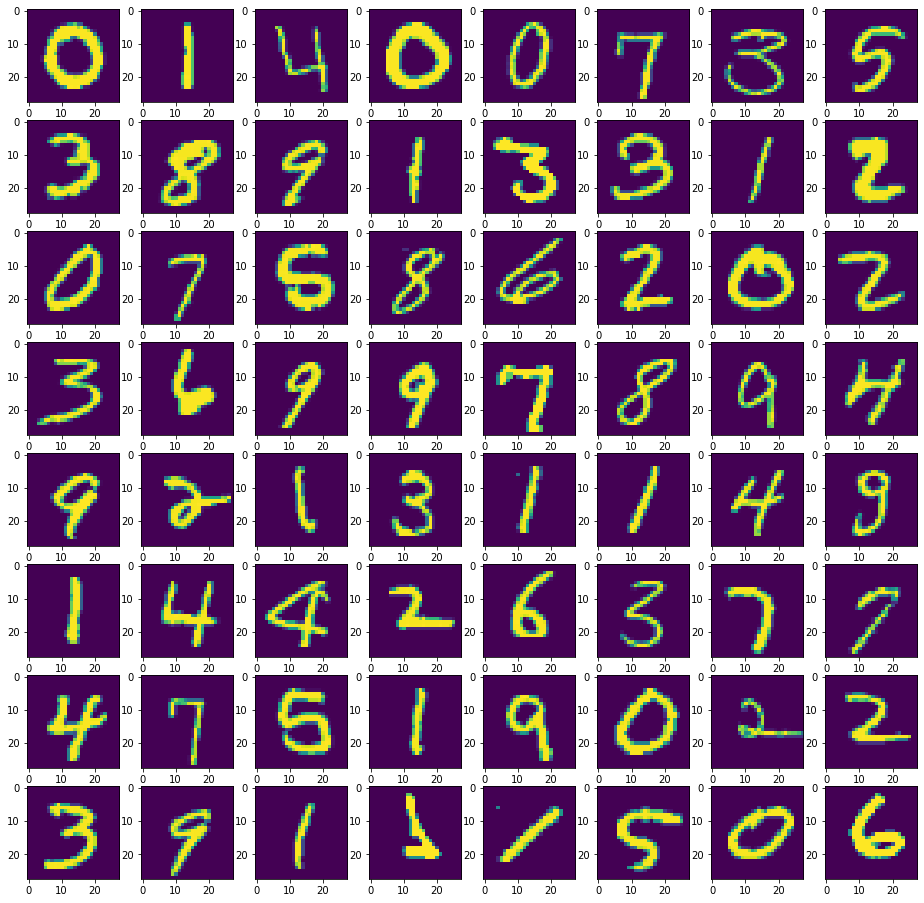

In [100]:
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = 8
h,w = 10,10
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i][:,:,0])
plt.show()

## Till now we have done our data modifications and visualisation

# CNN Modeling starts now

We used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [12]:
# selecting model : selected model sequential 
model = sq()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 256,activation = 'sigmoid'))
#another activations we can use :- 'relu','softmax'

model.add(Dense(units = 10,activation = 'sigmoid'))

# Set the optimizer and annealer

Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm.

We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy".

The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss.

We choosed RMSprop (with default values), it is a very effective optimizer. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. We could also have used Stochastic Gradient Descent ('sgd') optimizer, but it is slower than RMSprop.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

In [14]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

## Epochs and Batchsize 

Epochs are like for how many times we need to train our on same dataset. The noticing effect here worth noticing is that if we train too many times then our model will overfit the data.
batchsize :- lets assume we have 1000 images to train on and we choose batch size as 10 then our model will learn 10 images then adjusts its weight matrix then with these new learned values it learns next 10 images

In [15]:
epochs = 2
batch_size = 86

## Data Augmentation ( Currently not used ) 

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

## Fitting the above compiled model 

In [16]:
model.fit(x_train1,y_train1,epochs = epochs, batch_size = batch_size )

Epoch 1/2
37800/37800 [==============================] - 79s 2ms/step - loss: 0.4969 - accuracy: 0.8671
Epoch 2/2
37800/37800 [==============================] - 90s 2ms/step - loss: 0.0886 - accuracy: 0.9758


# Evaluating the Model 

## 1. Confusion Matrix

Confusion matrix can be very helpfull to see your model drawbacks.

I plot the confusion matrix of the validation results.

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_val_pred = model.predict(x_test)


## Lets see what our model has predicted

AxesImage(54,36;334.8x217.44)
Predicted Value :-  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual Image :-  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


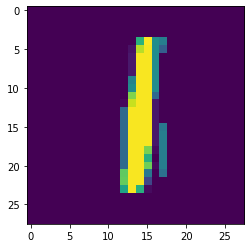

In [80]:
print(plt.imshow(x_test[2]))
print("Predicted Value :- ",y_val_pred[2])
print("Actual Image :- ",y_test[2])

We see that the predicted values are not in form of 1 and 0. this is because this model tells that if a image is 0 or not, then 1 or not and so on. we select the digit which it says that have highest value. in this case 1 has highest value.

In [52]:
y_val_pred

array([[2.41696835e-05, 2.49445438e-05, 1.14083290e-04, ...,
        2.38120556e-05, 5.47170639e-05, 7.87377357e-05],
       [1.37090683e-05, 3.34978104e-05, 3.42726707e-06, ...,
        3.34203243e-04, 8.75890255e-05, 5.00033855e-01],
       [2.11596489e-06, 5.18243909e-01, 8.67247581e-05, ...,
        3.37958336e-05, 1.62720680e-05, 2.67326832e-05],
       ...,
       [2.52395868e-04, 4.43756580e-05, 9.69171524e-05, ...,
        1.75833702e-06, 1.47640705e-04, 3.26931477e-05],
       [6.77406788e-05, 1.09016895e-04, 2.12336421e-01, ...,
        1.26349926e-03, 7.83801079e-05, 1.37090683e-05],
       [6.16908073e-06, 1.12861395e-04, 1.51127577e-04, ...,
        3.46557200e-01, 2.20239162e-05, 8.15033913e-04]], dtype=float32)

In [66]:
n = len(y_val_pred)
y_pred_digits = []

for i in range(n):
    max_val = max(y_val_pred[i])
    for j in range(10):
        if y_val_pred[i][j] == max_val:
            y_val_pred[i][j] = j
            y_pred_digits.append(j)
            break
        else:
            y_val_pred[i][j] = 0



In [65]:
y_true_digits = []

for i in range(len(y_test)):
    max_val = max(y_test[i])
    for j in range(10):
        if y_test[i][j] == max_val:
            y_test[i][j] = j
            y_true_digits.append(j)
            break
        else:
            y_test[i][j] = 0


In [90]:
print("Accuracy score based on formulae |a-b|^2 ", accuracy_score(y_pred_digits,y_true_digits))

Accuracy score based on formulae |a-b|^2  0.8854761904761905


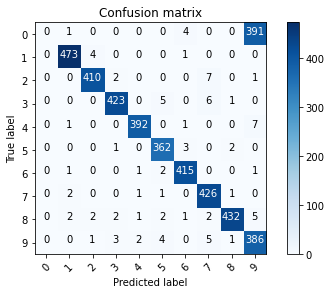

In [75]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_digits,y_pred_digits)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

## Lets Display Some Results which our model predicted wrong

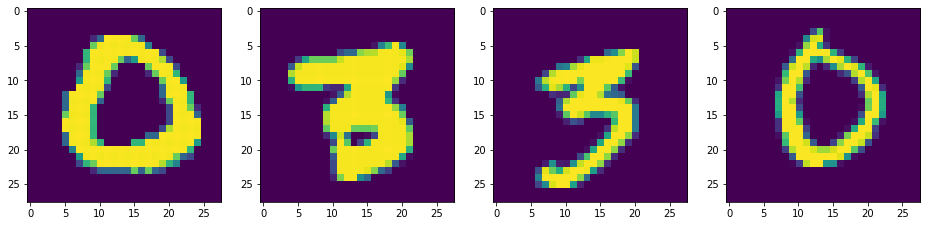

In [99]:
error_cnt = 0
errors = []

for i in range(n):
    if y_pred_digits[i] != y_true_digits[i]:
        errors.append(i)
    if len(errors) >= 64:
        break
        
        
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 1
h,w = 28,28
for i in errors:
    fig.add_subplot(rows, columns, error_cnt+1)
    plt.imshow(x_test[i][:,:,0] )
    error_cnt += 1
    if error_cnt >= 4 :
        break
plt.show()